# Impact du confinement sur les indicateurs de pollution en Bretagne

Aude Pertron

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [222]:
df = pd.read_csv('pollution.csv')

## Visualisation des données

In [223]:
df.shape

(2547, 15)

In [224]:
df.head()

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid--15c6355_1774380549c_-654d,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid--15c6355_1774380549c_-654c,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid--15c6355_1774380549c_-654b,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid--15c6355_1774380549c_-654a,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid--15c6355_1774380549c_-6549,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600


In [225]:
df.columns

Index(['FID', 'date_ech', 'valeur', 'qualif', 'source', 'type_zone',
       'code_zone', 'lib_zone', 'val_no2', 'val_so2', 'val_o3', 'val_pm10',
       'val_pm25', 'geom', 'couleur'],
      dtype='object')

In [226]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FID        2547 non-null   object
 1   date_ech   2547 non-null   object
 2   valeur     2547 non-null   int64 
 3   qualif     2547 non-null   object
 4   source     2547 non-null   object
 5   type_zone  2547 non-null   object
 6   code_zone  2547 non-null   int64 
 7   lib_zone   2547 non-null   object
 8   val_no2    2547 non-null   int64 
 9   val_so2    2547 non-null   int64 
 10  val_o3     2547 non-null   int64 
 11  val_pm10   2547 non-null   int64 
 12  val_pm25   2547 non-null   int64 
 13  geom       2547 non-null   object
 14  couleur    2547 non-null   object
dtypes: int64(7), object(8)
memory usage: 298.6+ KB


In [227]:
df_cat = df.select_dtypes(include='object')
print("il y a " +str(len(df_cat.columns)) +" variables qualitatives")
df_cat.columns

il y a 8 variables qualitatives


Index(['FID', 'date_ech', 'qualif', 'source', 'type_zone', 'lib_zone', 'geom',
       'couleur'],
      dtype='object')

In [228]:
#vérification de la présence de valeurs nulles
df_cat.isna().sum()

FID          0
date_ech     0
qualif       0
source       0
type_zone    0
lib_zone     0
geom         0
couleur      0
dtype: int64

In [229]:
for var in df_cat: 
    print("========="+str(var)+"=========")
    print(df[var].value_counts())

=========FID=========
ind_bretagne_agglo.fid--15c6355_1774380549c_-627e    1
ind_bretagne_agglo.fid--15c6355_1774380549c_-603a    1
ind_bretagne_agglo.fid--15c6355_1774380549c_-60d3    1
ind_bretagne_agglo.fid--15c6355_1774380549c_-6382    1
ind_bretagne_agglo.fid--15c6355_1774380549c_-63f7    1
                                                    ..
ind_bretagne_agglo.fid--15c6355_1774380549c_-5b5c    1
ind_bretagne_agglo.fid--15c6355_1774380549c_-61ff    1
ind_bretagne_agglo.fid--15c6355_1774380549c_-6386    1
ind_bretagne_agglo.fid--15c6355_1774380549c_-64d6    1
ind_bretagne_agglo.fid--15c6355_1774380549c_-5b60    1
Name: FID, Length: 2547, dtype: int64
=========date_ech=========
2020-04-03T10:00:00    7
2020-01-30T10:00:00    7
2020-02-04T10:00:00    7
2020-08-11T10:00:00    7
2020-10-17T10:00:00    7
                      ..
2020-02-07T10:00:00    6
2020-02-18T10:00:00    6
2020-04-11T10:00:00    6
2020-02-25T10:00:00    2
2020-02-10T10:00:00    1
Name: date_ech, Length: 367, dtyp

## Préparation des données

In [230]:
#remanier la variable date pour lui enlever l'heure
date = []
for col, row in df['date_ech'].iteritems():
    row = row.split('T')[0]
    date.append(row)
df.insert(0, "date", date, True)

In [231]:
#Drop de la colonne FID, source, type zone, et val_pm25
df = df.drop(['FID', 'source', 'type_zone', 'val_pm25', 'date_ech', 'val_so2', 'code_zone', 'couleur'], axis = 1) 
df.head()

,date,valeur,qualif,lib_zone,val_no2,val_o3,val_pm10,geom
0,2021-01-01,3,Bon,CA Saint-Brieuc Armor,0,0,0,POINT (269153.2682993477 6832824.934141148)
1,2021-01-01,3,Bon,CA Golfe du Morbihan - Vannes,0,0,0,POINT (269961.1106939723 6746307.8992528645)
2,2021-01-01,3,Bon,CA Quimper Bretagne Occidentale,0,0,0,POINT (172753.63056731108 6795400.543816281)
3,2021-01-01,3,Bon,Rennes Métropole,0,0,0,POINT (349555.0070453745 6789093.386528317)
4,2021-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,POINT (338719.75810268405 6844013.788199687)


In [252]:
#passage de la variable date en format date
df.date = pd.to_datetime(df.date)

In [235]:
#groupby pour avoir des données moyennes sur toute la Bretagne
df_moyenne = df.groupby('date').mean()
df_moyenne

,valeur,val_no2,val_o3,val_pm10
date,,,,
2020-01-01,3.000000,1.857143,2.571429,2.428571
2020-01-02,3.142857,1.571429,2.857143,2.428571
2020-01-03,3.428571,1.571429,3.428571,2.857143
2020-01-04,3.142857,2.000000,2.428571,3.142857
2020-01-05,4.000000,2.000000,2.714286,3.857143
...,...,...,...,...
2020-12-28,3.285714,1.000000,3.285714,2.142857
2020-12-29,3.000000,1.142857,3.000000,2.142857
2020-12-30,2.857143,1.428571,2.857143,1.571429


In [236]:
df_zone = df.groupby('lib_zone').mean()

In [237]:
df_zone

,valeur,val_no2,val_o3,val_pm10
lib_zone,,,,
Brest Métropole,3.819945,1.290859,3.598338,2.916898
CA Golfe du Morbihan - Vannes,3.723288,1.263014,3.536986,2.632877
CA Lorient,3.731507,1.246575,3.550685,2.687671
CA Quimper Bretagne Occidentale,3.713115,1.150273,3.565574,2.655738
CA Saint-Brieuc Armor,3.660274,1.235616,3.479452,2.641096
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,1.181818,3.479339,3.011019
Rennes Métropole,3.646409,1.439227,3.411602,2.748619


In [238]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.pie(df_zone, values='valeur', names=df_zone.index, title="Qualité de l'air par zone sur un an")
fig.show()

## Préparation des données pour une cartographie

In [239]:
df_zone = df.groupby('geom', as_index=False).mean()
df_zone

geom = df_zone['geom'].replace(r'POINT ', '', regex=True).str.replace(r'[(\)d]+', '')
geom = geom.str.split(' ')

geom_1 = []
geom_2 = []
for i in geom :
    geom_1.append(i[0])
    geom_2.append(i[1])

geom_1 = pd.DataFrame(geom_1).astype(float).round(3)
geom_2 = pd.DataFrame(geom_2).astype(float).round(3)

df_zone = pd.concat([df_zone, geom_1.reindex(df_zone.index)], axis=1)
df_zone = df_zone.rename(columns={df_zone.columns[5]: "longitude"})
df_zone = pd.concat([df_zone, geom_2.reindex(df_zone.index)], axis=1)
df_zone = df_zone.rename(columns={df_zone.columns[6]: "latitude"})

del df_zone['geom']

<ipython-input-239-ba946d3a2b2a>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [240]:
df_zone

,valeur,val_no2,val_o3,val_pm10,longitude,latitude
0,3.819945,1.290859,3.598338,2.916898,147878.224,6837175.794
1,3.713115,1.150273,3.565574,2.655738,172753.631,6795400.544
2,3.731507,1.246575,3.550685,2.687671,229772.040,6768639.927
3,3.660274,1.235616,3.479452,2.641096,269153.268,6832824.934
4,3.723288,1.263014,3.536986,2.632877,269961.111,6746307.899
5,3.757576,1.181818,3.479339,3.011019,338719.758,6844013.788
6,3.646409,1.439227,3.411602,2.748619,349555.007,6789093.387


In [241]:
#2154 to 4326
#utilisation de pyproj pour transformer les données lambert 93 en latitude et longitude

from pyproj import Transformer

transformer = Transformer.from_crs("epsg:2154", "epsg:4326")

df_zone.latitude, df_zone.longitude = transformer.transform(df_zone.longitude, df_zone.latitude)

print (df_zone)

     valeur   val_no2    val_o3  val_pm10  longitude   latitude
0  3.819945  1.290859  3.598338  2.916898  -4.470520  48.399641
1  3.713115  1.150273  3.565574  2.655738  -4.085219  48.045952
2  3.731507  1.246575  3.550685  2.687671  -3.293846  47.849403
3  3.660274  1.235616  3.479452  2.641096  -2.832059  48.452434
4  3.723288  1.263014  3.536986  2.632877  -2.736238  47.676516
5  3.757576  1.181818  3.479339  3.011019  -1.902423  48.595360
6  3.646409  1.439227  3.411602  2.748619  -1.711339  48.108092


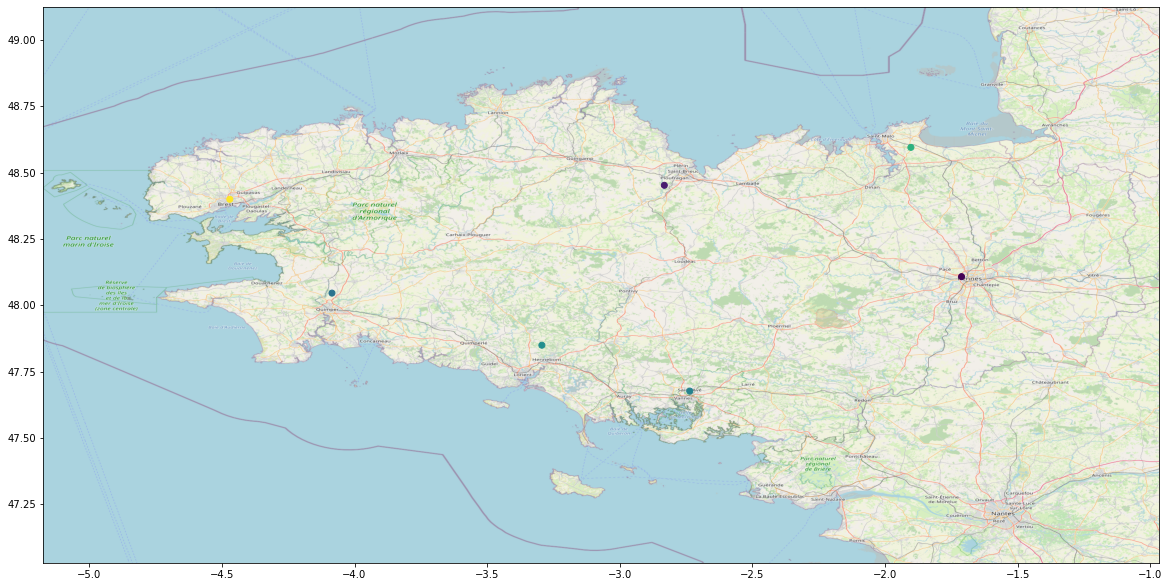

In [242]:
plt.figure(figsize = (20,20))

bretagne = plt.imread("map.png")
plt.imshow(bretagne, zorder=0, extent=[-5.175, -0.967, 47.029, 49.124])
plt.scatter(df_zone["longitude"],df_zone["latitude"], c= df_zone["valeur"])

In [243]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_moyenne.index, y=df_moyenne["valeur"],
                    mode='none',
                    name='valeur qualité', fill='tozeroy', fillcolor = 'rgb(200, 255, 255)'))
fig.add_trace(go.Scatter(x=df_moyenne.index, y=df_moyenne["val_no2"],
                    mode='lines',
                    name='no2'))
fig.add_trace(go.Scatter(x=df_moyenne.index, y=df_moyenne["val_o3"],
                    mode='lines', name='o3'))
fig.add_trace(go.Scatter(x=df_moyenne.index, y=df_moyenne["val_pm10"],
                    mode='lines', name='pm_10'))

#pour mémoire:
#premier confinement : 17/03/20 --> 11/05/20
#deuxième confinement : 30/10/20 --> 15/12/20

fig.show()



## Tests de graphes non utilisés

In [244]:
for var in df: 
    print("========="+str(var)+"=========")
    print(df[var].value_counts())

=========date=========
2020-11-30    7
2020-10-12    7
2020-12-30    7
2020-07-14    7
2020-01-27    7
             ..
2020-04-11    6
2020-03-24    6
2020-02-21    6
2020-02-25    2
2020-02-10    1
Name: date, Length: 367, dtype: int64
=========valeur=========
3    1148
4     942
5     314
6      70
2      48
7      19
8       6
Name: valeur, dtype: int64
=========qualif=========
Bon         2090
Moyen        314
Médiocre      89
Très bon      48
Mauvais        6
Name: qualif, dtype: int64
=========lib_zone=========
CA Quimper Bretagne Occidentale                        366
CA Lorient                                             365
CA Golfe du Morbihan - Vannes                          365
CA Saint-Brieuc Armor                                  365
CA du Pays de Saint-Malo (Saint-Malo Agglomération)    363
Rennes Métropole                                       362
Brest Métropole                                        361
Name: lib_zone, dtype: int64
=========val_no2=========
1    1955

df['date'] = pd.to_datetime(df['date'])
data['result'] = data['result'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
df.head()

In [245]:
#essai de graphe sur une seule région:

df_brest = df.loc[df["lib_zone"] == "Brest Métropole"]
df_brest.head()

,date,valeur,qualif,lib_zone,val_no2,val_o3,val_pm10,geom
5,2021-01-01,3,Bon,Brest Métropole,0,0,0,POINT (147878.22420658765 6837175.794037035)
7,2020-12-31,3,Bon,Brest Métropole,3,3,2,POINT (147878.22420658765 6837175.794037035)
19,2020-12-30,3,Bon,Brest Métropole,1,3,2,POINT (147878.22420658765 6837175.794037035)
21,2020-12-29,3,Bon,Brest Métropole,1,3,3,POINT (147878.22420658765 6837175.794037035)
32,2020-12-28,3,Bon,Brest Métropole,1,3,3,POINT (147878.22420658765 6837175.794037035)


In [246]:
df_rennes = df.loc[df["lib_zone"] == "Rennes Métropole"]
df_rennes.head()

,date,valeur,qualif,lib_zone,val_no2,val_o3,val_pm10,geom
3,2021-01-01,3,Bon,Rennes Métropole,0,0,0,POINT (349555.0070453745 6789093.386528317)
13,2020-12-31,3,Bon,Rennes Métropole,3,2,2,POINT (349555.0070453745 6789093.386528317)
14,2020-12-30,2,Très bon,Rennes Métropole,2,2,1,POINT (349555.0070453745 6789093.386528317)
22,2020-12-29,3,Bon,Rennes Métropole,2,3,2,POINT (349555.0070453745 6789093.386528317)
29,2020-12-28,3,Bon,Rennes Métropole,1,3,1,POINT (349555.0070453745 6789093.386528317)


In [247]:
val_brest = df_brest["valeur"].tolist()
date_brest = df_brest["date"].tolist()

val_rennes = df_rennes["valeur"].tolist()
date_rennes = df_rennes["date"].tolist()


In [248]:
test_matrix = [df.columns.values.tolist()] + df.values.tolist()

numpy.ndarray

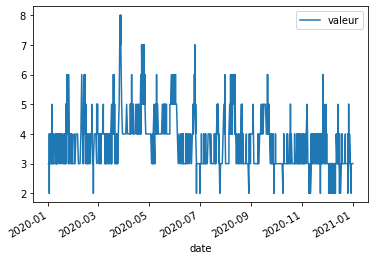

In [249]:
axes = df.plot.line(x='date', y='valeur', subplots=True)

type(axes)

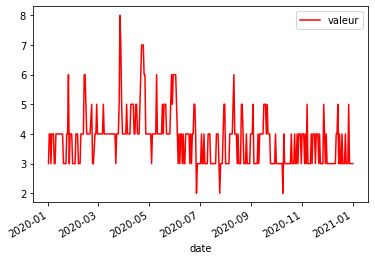

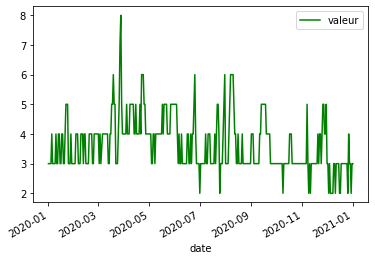

In [250]:

with pd.plotting.plot_params.use('x_compat', True):
    df_brest.plot(x='date', y='valeur', color='r')
    df_rennes.plot(x='date', y='valeur',color='g')



<AxesSubplot:xlabel='date'>

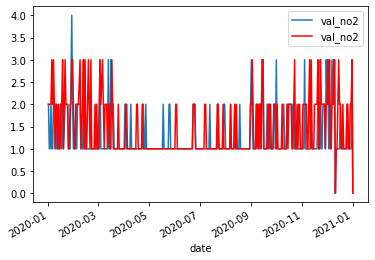

In [251]:
ax = plt.gca()

df_brest.plot(kind='line',x="date",y='val_no2',ax=ax)
df_rennes.plot(kind='line',x='date',y='val_no2', color='red', ax=ax)


In [220]:
df_rennes = df_rennes.drop(["qualif", "code_zone", "lib_zone", "val_no2", "val_o3", "val_pm10", "geom", "couleur"], axis = 1)
df_brest = df_brest.drop(["qualif", "code_zone", "lib_zone", "val_no2", "val_o3", "val_pm10", "geom", "couleur"], axis = 1)

nrow=3
ncol=2
# make a list of all dataframes 
df_list = [df_brest ,df_rennes]
fig, axes = plt.subplots(nrow, ncol)
# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c])
        count=+1

NameError: name 'df_rennes' is not defined

explication des métadonnées
https://data.airbreizh.asso.fr/geonetwork/srv/fre/catalog.search;jsessionid=1C153A10B37E5850C29E4B6EDEBCB671#/metadata/ac9b4cae-3d7b-476e-a453-2d989a953c70